In [1]:
# import dataset 
from sklearn.datasets import load_iris
# import train test split
from sklearn.model_selection import train_test_split

# for manipulating dataframes
import pandas as pd

# import svm algorithm
from sklearn.svm import SVC 

In [2]:
iris=load_iris() # save data & objects to iris

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # add iris data to a dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# add target to dataframe
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt # visualisation package



In [9]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [10]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [12]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


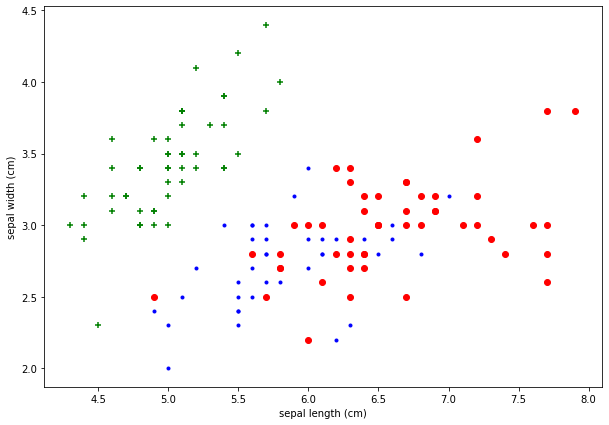

In [13]:
plt.figure(figsize=(10,7))
plt.xlabel('sepal length (cm)');
plt.ylabel('sepal width (cm)');
plt.scatter(x=df0['sepal length (cm)'], y=df0['sepal width (cm)'], color='green', marker='+');
plt.scatter(x=df1['sepal length (cm)'], y=df1['sepal width (cm)'], color='blue', marker='.');
plt.scatter(x=df2['sepal length (cm)'], y=df2['sepal width (cm)'], color='red', marker='o');

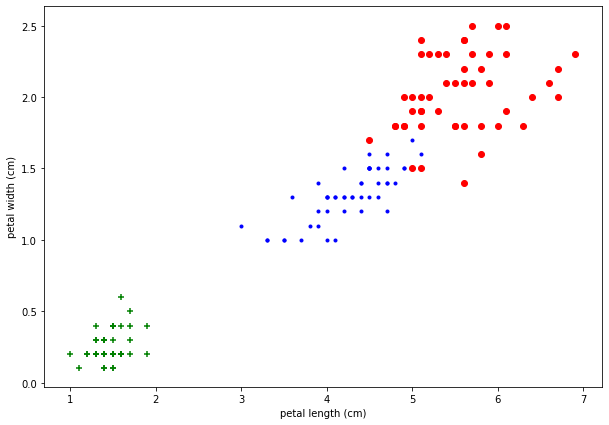

In [14]:
plt.figure(figsize=(10,7))
plt.xlabel('petal length (cm)');
plt.ylabel('petal width (cm)');
plt.scatter(x=df0['petal length (cm)'], y=df0['petal width (cm)'], color='green', marker='+');
plt.scatter(x=df1['petal length (cm)'], y=df1['petal width (cm)'], color='blue', marker='.');
plt.scatter(x=df2['petal length (cm)'], y=df2['petal width (cm)'], color='red', marker='o');

In [15]:
# need to drop some columns 
# creating features for svm

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
X =df[features]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# target
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [17]:
 X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [18]:
print(X_test.size)
print(X_train.size)
print(X.size)

120
480
600


In [51]:
model_svm = SVC(kernel='linear')

In [52]:
model_svm.fit(X_train,y_train) # fit the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
model_svm.score(X_test,y_test)

0.975

### Exercise
using the digits exercise

In [54]:
from sklearn.datasets import load_digits

digits = load_digits()

In [55]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 720x504 with 0 Axes>

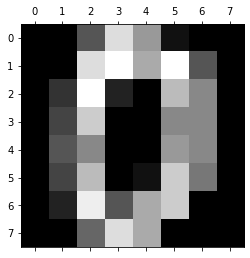

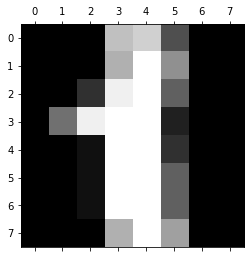

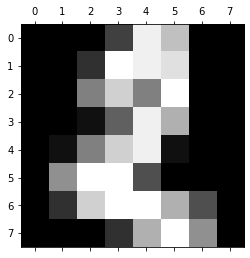

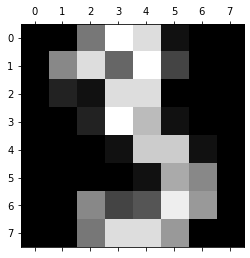

In [56]:
plt.figure(figsize=(10,7))
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [57]:
digits_df=pd.DataFrame(data=digits.data)
digits_df['target']=digits.target
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [26]:
# features
features=list(range(0,64))
X=digits_df[features]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [27]:
# target
y=digits.target

In [28]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.20) # assign data into training and testing set

# print train and test size
print(X_train.size)
print(X.size)

91968
115008


In [29]:
model=SVC(kernel='linear') # fit data using a linear kernel

In [30]:
model.fit(X_train,y_train) # fit the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
model.score(X_test,y_test)

0.975

#### best score is 97% with the linear kernel